Note that for ease in coding/troubleshooting, problems were written as separate functions to call as needed.
Also note that in converting from Jupyter Notebook to PDF, the "center" command for string printing appears to not work. All answers are contained between: `...| |...`

In [1]:
import pandas as pd
import numpy as np
import patsy
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats

In [2]:
def title_print(text):
    '''
    Used throughout to print section titles
    '''
    print()
    print('#' * 80)
    print('|', text.center(76, ' '), '|')
    print('#' * 80)

# Problem 1

In [3]:
def Problem_1():
    df = pd.DataFrame(data =
                      {'Estimate':      [np.nan, 5.3036, 4.0336, -9.3153,
                                         0.5884],
                       'Std. Error':    [0.1960, 2.5316, 2.4796, 2.4657,
                                         2.2852],
                       't value':       [8.438, np.nan, 1.627, -3.778,
                                         0.257],
                       'Pr(>|t|)':      [3.57e-13, 0.038834, 0.107111,
                                         0.000276, 0.797373]},
                      index = ['Intercept', 'x1', 'x2', 'x3', 'x4'])
    ###############
    # Problem 1.1 #
    ###############
    title_print('Problem 1.1')
    
    t = df.loc['x1']['Estimate'] / df.loc['x1']['Std. Error']
    print('| t-statistic = {} |'.format(round(t, 3)).center(80, '.'))

    ###############
    # Problem 1.2 #
    ###############
    title_print('Problem 1.2')
    
    DoF_resid = 95
    k = 4
    p = k + 1
    n = DoF_resid + p
    
    print('| {} observations (k = {} | p = {} | DoF resid = {}) |'.\
          format(n, k, p, DoF_resid).center(80, '.'))

    ###############
    # Problem 1.3 #
    ###############
    title_print('Problem 1.3')
    
    print('| Yes, H0: B3 = 0 rejected at 0.05 level because p-value = {} |'.\
          format(df.loc['x3']['Pr(>|t|)']).center(80, '.'))

    ###############
    # Problem 1.4 #
    ###############
    title_print('Problem 1.4')
    
    B0_est = df.loc['Intercept']['t value'] * df.loc['Intercept']['Std. Error']
    print('| Estimate of intercept B0 = {} |'.format(round(B0_est, 3)).\
                                                     center(80, '.'))
    
    ###############
    # Problem 1.5 #
    ###############
    title_print('Problem 1.5')
    
    t_test = round(scipy.stats.t.ppf(0.975, df = 95), 3)
    
    print('| {} +/- {} * {} |'.format(df.loc['x3']['Estimate'],
                                      t_test,
                                      df.loc['x3']['Std. Error']).\
          center(80, '.'))

    return df

In [4]:
df1 = Problem_1()


################################################################################
|                                 Problem 1.1                                  |
################################################################################
............................| t-statistic = 2.095 |.............................

################################################################################
|                                 Problem 1.2                                  |
################################################################################
.............| 100 observations (k = 4 | p = 5 | DoF resid = 95) |..............

################################################################################
|                                 Problem 1.3                                  |
################################################################################
.....| Yes, H0: B3 = 0 rejected at 0.05 level because p-value = 0.000276 |......

########################

# Problem 3

In [5]:
def Problem_3():
    
    DoF_mod = 3
    DoF_err = np.nan
    DoF_tot = 23
    SS_mod = np.nan
    SS_err = 61.44300
    SS_tot = 689.26000
    MS_mod = np.nan
    MS_err = np.nan
    F = np.nan
    P = np.nan
    
    df = pd.DataFrame(data = {'DoF':            [DoF_mod, DoF_err, DoF_tot],
                              'Sum of Squares': [SS_mod, SS_err, SS_tot],
                              'Mean Square':    [MS_mod, MS_err, ''],
                              'F Value':        [F, '', ''],
                              'PR > F':         [P, '', '']},
                      index = ['Model', 'Error', 'Corrected Total'])
    
    ###############
    # Problem 3.1 #
    ###############
    title_print('Problem 3.1')
    
    obs = df.loc['Corrected Total']['DoF'] + 1
    
    print('| Observations = {} |'.format(int(obs)).center(80, '.'))
    
    ###############
    # Problem 3.2 #
    ###############
    title_print('Problem 3.2')
    
    DoF_err = DoF_tot - DoF_mod
    SS_mod = SS_tot - SS_err
    MS_mod = SS_mod / DoF_mod
    MS_err = SS_err / DoF_err
    F = MS_mod / MS_err
    P = round(1 - scipy.stats.f.cdf(F, DoF_mod, DoF_err), 10)
    
    df = pd.DataFrame(data = {'DoF':            [DoF_mod, DoF_err, DoF_tot],
                              'Sum of Squares': [SS_mod, SS_err, SS_tot],
                              'Mean Square':    [MS_mod, MS_err, ''],
                              'F Value':        [F, '', ''],
                              'PR > F':         [P, '', '']},
                      index = ['Model', 'Error', 'Corrected Total'])
    print(df)

    ###############
    # Problem 3.3 #
    ###############
    title_print('Problem 3.3')
    
    print('| y = B_0 + B_1 * x_1 + B_2 * x_2 + B_3 * x_3 + e |'.\
          center(80, '.'))
    print('| H_0: B_1 = B_2 = B_3 = 0 |'.center(80, '.'))
    print('| F_0 > F(0.05, 3, 20), therefore reject H_0 |'.center(80, '.'))

    ###############
    # Problem 3.4 #
    ###############
    title_print('Problem 3.4')
    
    r_squared = SS_mod / SS_tot
    
    print('| R^2 = {} |'.format(round(r_squared, 4)).center(80, '.'))

    ###############
    # Problem 3.5 #
    ###############
    title_print('Problem 3.5')
    
    k = 3
    p = k + 1
    
    r_adj = 1 - (SS_err / (obs - p) / (SS_tot / (obs - 1)))
    
    print('| R^2-adjusted = {} |'.format(round(r_adj, 4)).center(80, '.'))

    ###############
    # Problem 3.6 #
    ###############
    title_print('Problem 3.6')
    
    print('| Sigma = {} |'.format(round(np.sqrt(MS_err), 4)).center(80, '.'))
    
    return df

In [6]:
df3 = Problem_3()


################################################################################
|                                 Problem 3.1                                  |
################################################################################
.............................| Observations = 24 |..............................

################################################################################
|                                 Problem 3.2                                  |
################################################################################
                 DoF  Sum of Squares Mean Square  F Value PR > F
Model              3         627.817     209.272  68.1192  1e-10
Error             20          61.443     3.07215                
Corrected Total   23         689.260                            

################################################################################
|                                 Problem 3.3                                  |
########

# Problem 6

In [7]:
def Problem_6():
    df = pd.DataFrame(data = {'X': [4.0, 4.5, 5.0, 5.5, # Grams of Product
                                    6.0, 6.5, 7.0],
                              'y': [32, 43, 45, 51, 53, 61, 62]}) # Sud height
    y, X = patsy.dmatrices('y ~ X', df)
    model = sm.OLS(y, X)
    results = model.fit()
    results.model.data.design_info = X.design_info

    ###############
    # Problem 6.a #
    ###############
    title_print('Problem 6.a')
    print('| y = {} + {} * x + e |'.format(results.params[0],
                                           results.params[1]).center(80, '.'))
    
    ###############
    # Problem 6.b #
    ###############
    title_print('Problem 6.b')
    print('| R^2 = {} | High R^2 value suggests statistical significant |'.\
          format(results.rsquared).center(80, '.'))

    ###############
    # Problem 6.c #
    ###############
    title_print('Problem 6.c')
    fig, ax = plt.subplots()
    ax.scatter(results.fittedvalues, results.resid)
    ax.axhline(0)
    ax.set_xlabel('Fitted Values')
    ax.set_ylabel('Residuals')
    plt.title('Residuals Versus Predicted Response')
    plt.show()
    print('| Erratic residuals when plotting vs. predicted response |'.\
          center(80, '.'))
    print('| Likely more complicated model would fit better |'.center(80, '.'))
    
    return df


################################################################################
|                                 Problem 6.a                                  |
################################################################################
.............| y = -3.0714285714285836 + 9.57142857142857 * x + e |.............

################################################################################
|                                 Problem 6.b                                  |
################################################################################
.| R^2 = 0.9547001276052743 | High R^2 value suggests statistical significant |.

################################################################################
|                                 Problem 6.c                                  |
################################################################################


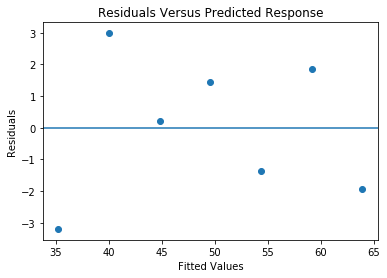

...........| Erratic residuals when plotting vs. predicted response |...........
...............| Likely more complicated model would fit better |...............


In [8]:
df6 = Problem_6()

# Problem 7

In [9]:
def Problem_7():    
    df = pd.DataFrame(data = {'y': # Miles/gal
                              [18.90, 17.00, 20.00, 18.25,
                               20.07, 11.20, 22.12, 21.47,
                               34.70, 30.40, 16.50, 36.50,
                               21.50, 19.70, 20.30, 17.80,
                               14.39, 14.89, 17.80, 16.41,
                               23.54, 21.47, 16.59, 31.90,
                               29.40, 13.27, 23.90, 19.73,
                               13.90, 13.27, 13.77, 16.50],
                              'X1': # Displacement (in^3)
                              [350, 350, 250, 351,
                               225, 440, 231, 262,
                               89.7, 96.9, 350, 85.3,
                               171, 258, 140, 302,
                               500, 440, 350, 318,
                               231, 360, 400, 96.9,
                               140, 460, 133.6, 318,
                               351, 351, 360, 350],
                              'X2': # Weight (lbs)
                              [3910, 3860, 3510, 3890,
                               3365, 4215, 3020, 3180,
                               1905, 2320, 3885, 2009,
                               2655, 3375, 2700, 3890,
                               5290, 5185, 3910, 3660,
                               3050, 4250, 3850, 2275,
                               2150, 5430, 2535, 4370,
                               4540, 4715, 4215, 3660]},
                      index = ['Apollo', 'Omega', 'Nova', 'Monarch',
                               'Duster', 'Jenson Conv.', 'Skyhawk', 'Monza',
                               'Scirocco', 'Corolla SR-5', 'Camaro',
                               'Datsun B210', 'Capri II', 'Pacer', 'Bobcat',
                               'Granada', 'Eldorado', 'Imperial', 'Nova LN',
                               'Valiant', 'Starfire', 'Cordoba', 'Trans Am',
                               'Corolla E-5', 'Astre', 'Mark IV', 'Celica GT',
                               'Charger SE', 'Cougar', 'Elite', 'Matador',
                               'Corvette'])
    
    ###############
    # Problem 7.a #
    ###############
    title_print('Problem 7.a')
    
    y, X = patsy.dmatrices('y ~ X1 + X2', df)
    model = sm.OLS(y, X)
    results = model.fit()
    results.model.data.design_info = X.design_info
    
    print('| y = {} + {} * x1 + {} * x2 + e |'.format(
          round(results.params[0], 3),
          round(results.params[1], 3),
          round(results.params[2], 3)).center(80, '.'))

    ###############
    # Problem 7.b #
    ###############
    title_print('Problem 7.b')

    aov_table = sm.stats.anova_lm(results, typ = 1)
    print('\n--- Analysis of Variance table ---\n{}'.format(aov_table))
    print('\nRegression F: {}'.format(round(results.fvalue, 2)))
    print('Regression p: {}\n'.format(round(results.f_pvalue, 4)))
    print('| Based on P-values, X1 is significant, X2 is not |'.\
          center(80, '.'))

    ###############
    # Problem 7.c #
    ###############
    title_print('Problem 7.c')
    
    print('| R-squared explains {}% of total variability |'.\
          format(round(results.rsquared * 100, 2)).center(80, '.'))

    ###############
    # Problem 7.d #
    ###############
    title_print('Problem 7.d')

    conf_int = np.round(results.conf_int(), 5)
    
    print('| 95% Confidence Intervals |'.center(80, '.'))
    print('| Intercept: {} |'.format(conf_int[0]).center(80, '.'))
    print('| B1: {} |'.format(conf_int[1]).center(80, '.'))
    print('| B2: {} |'.format(conf_int[2]).center(80, '.'))
    print('| 95% confident respective slopes are between these values |'.\
          center(80, '.'))

    ###############
    # Problem 7.e #
    ###############
    title_print('Problem 7.e')

    intervals = np.round(results.get_prediction([1, 275, 3000]).\
                         summary_frame(alpha = 0.05), 4)

    print('| 95% Confidence Interval |'.center(80, '.'))
    print('| {} to {} |'.format(intervals['mean_ci_lower'].values,
                                intervals['mean_ci_upper'].values).\
                         center(80, '.'))
    print('| 95% confident interval contains true mean |'.center(80, '.'))
    
    ###############
    # Problem 7.f #
    ###############
    title_print('Problem 7.f')
    
    print('| 95% Prediction Interval |'.center(80, '.'))
    print('| {} to {} |'.format(intervals['obs_ci_lower'].values,
                                intervals['obs_ci_upper'].values).\
                         center(80, '.'))
    print('| 95% confident interval contains prediction |'.center(80, '.'))

    ###############
    # Problem 7.g #
    ###############
    title_print('Problem 7.g')
    
    print('| Prediction interval is wider |'.center(80, '.'))
    print('| More uncertainty when making single/specific prediction |'.\
          center(80, '.'))
    
    #################
    # Problem 7.h.1 #
    #################
    title_print('Problem 7.h.1')
    
    residuals = results.resid
    prob = [(i - 1/2) / len(y) for i in range(len(y))]
    
    # Can plot straight line for visuals
    resid_results = sm.OLS(prob, sm.add_constant(sorted(residuals))).fit()
    X_range = np.linspace(min(residuals), max(residuals), len(residuals))
    
    # Normal Probability Plot + straight line
    fig, ax = plt.subplots()
    ax.scatter(sorted(residuals), prob)
    ax.plot(X_range,
            resid_results.params[0] + resid_results.params[1] * X_range)
    ax.set_xlabel('Residual')
    ax.set_ylabel('Probability')
    ax.set_ylim(0, 1)
    plt.title('Normal Probability Plot')
    plt.show()
    
    print('| Does not appear to be problem with normality |'.center(80, '.'))

    #################
    # Problem 7.h.2 #
    #################
    title_print('Problem 7.h.2')
    
    fig, ax = plt.subplots()
    ax.scatter(results.fittedvalues, residuals)
    ax.axhline(0)
    ax.set_xlabel('Fitted Values')
    ax.set_ylabel('Residuals')
    plt.title('Residuals Versus Predicted Response')
    plt.show()
    
    print('| Definite non-linear pattern. Either slight downward trend |'.\
          center(80, '.'))
    print('| if you disregard 5 points in upper right. OR somewhat |'.\
          center(80, '.'))
    print('| quadratic if disregard 3 points in lower right |'.center(80, '.'))
    
    #################
    # Problem 7.h.3 #
    #################
    title_print('Problem 7.h.3')
    
    fig, ax = plt.subplots()
    ax2 = ax.twiny()
    scat_1 = ax.plot(df['X1'], residuals,
                     marker = '*', linestyle = '', color = 'orange', label = 'X1')
    scat_2 = ax2.plot(df['X2'], residuals,
                      marker = 'o', linestyle = '', color = 'black', label = 'X2')
    ax.axhline(0)
    ax.set_xlabel('X_1')
    ax2.set_xlabel('X_2')
    ax.set_ylabel('Residuals')
    
    plots = scat_1 + scat_2
    labels = [label.get_label() for label in plots]
    ax.legend(plots, labels, loc = 'lower right')
    plt.title('Residuals Versus X_i')
    plt.show()
    
    print('| One y value plotted for each X-value |'.center(80, '.'))
    print('| Non-linear pattern trends to upper right |'.center(80, '.'))

    return df, results


################################################################################
|                                 Problem 7.a                                  |
################################################################################
.................| y = 36.525 + -0.032 * x1 + -0.002 * x2 + e |.................

################################################################################
|                                 Problem 7.b                                  |
################################################################################

--- Analysis of Variance table ---
            df      sum_sq     mean_sq           F        PR(>F)
X1         1.0  955.340350  955.340350  102.317673  5.086035e-11
X2         1.0   11.430669   11.430669    1.224233  2.776257e-01
Residual  29.0  270.773068    9.337002         NaN           NaN

Regression F: 51.77
Regression p: 0.0

..............| Based on P-values, X1 is significant, X2 is not |...............

#############

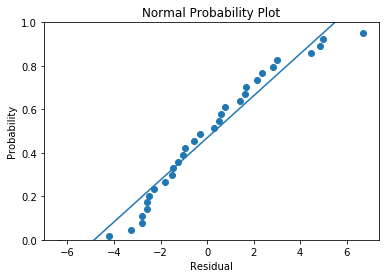

................| Does not appear to be problem with normality |................

################################################################################
|                                Problem 7.h.2                                 |
################################################################################


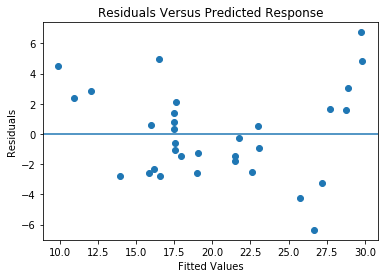

.........| Definite non-linear pattern. Either slight downward trend |..........
...........| if you disregard 5 points in upper right. OR somewhat |............
...............| quadratic if disregard 3 points in lower right |...............

################################################################################
|                                Problem 7.h.3                                 |
################################################################################


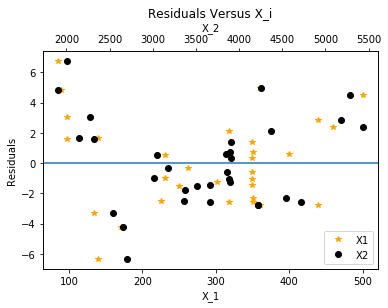

....................| One y value plotted for each X-value |....................
..................| Non-linear pattern trends to upper right |..................


In [10]:
df7, results7 = Problem_7()